In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('file:///C:/Users/SR%20COMPUTER/Downloads/Compressed/covid_19_clean_complete_2022.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
df.shape

(214894, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214894 entries, 0 to 214893
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  65705 non-null   object 
 1   Country/Region  214894 non-null  object 
 2   Lat             213348 non-null  float64
 3   Long            213348 non-null  float64
 4   Date            214894 non-null  object 
 5   Confirmed       214894 non-null  int64  
 6   Deaths          214894 non-null  int64  
 7   Recovered       214894 non-null  int64  
 8   Active          214894 non-null  int64  
 9   WHO Region      212575 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 16.4+ MB


In [5]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [6]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [7]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,213348.000000,213348.000000,2.148940e+05,214894.000000,2.148940e+05,2.148940e+05
mean,20.528131,22.735337,4.578132e+05,9310.764693,1.079987e+05,3.405037e+05
std,25.899139,76.304185,2.708770e+06,47497.835275,8.470111e+05,2.516382e+06
min,-71.949900,-178.116500,0.000000e+00,0.000000,0.000000e+00,-1.638280e+05
25%,6.426991,-27.932425,2.530000e+02,2.000000,0.000000e+00,1.600000e+01
50%,22.233350,21.752000,5.223000e+03,71.000000,4.500000e+01,1.243000e+03
75%,41.166070,88.658375,9.892275e+04,1675.000000,5.115750e+03,2.644675e+04
max,71.706900,178.065000,7.925051e+07,958144.000000,3.097475e+07,7.829236e+07


In [8]:
df.min()

C:\Users\SR COMPUTER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Country/Region    Afghanistan
Lat                  -71.9499
Long                -178.1165
Date               2020-01-22
Confirmed                   0
Deaths                      0
Recovered                   0
Active                -163828
dtype: object

In [9]:
df.max()

C:\Users\SR COMPUTER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Country/Region      Zimbabwe
Lat                  71.7069
Long                 178.065
Date              2022-03-04
Confirmed           79250509
Deaths                958144
Recovered           30974748
Active              78292365
dtype: object

In [10]:
df.corr()

,Lat,Long,Confirmed,Deaths,Recovered,Active
Lat,1.000000,-0.076193,0.045692,0.023828,-0.007068,0.051112
Long,-0.076193,1.000000,-0.060558,-0.097403,-0.009475,-0.060158
Confirmed,0.045692,-0.060558,1.000000,0.922620,0.330394,0.947829
Deaths,0.023828,-0.097403,0.922620,1.000000,0.354855,0.854839
Recovered,-0.007068,-0.009475,0.330394,0.354855,1.000000,0.012357
Active,0.051112,-0.060158,0.947829,0.854839,0.012357,1.000000


In [11]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,6.0,0.172895,0.407864,-0.076193,0.000656,0.034760,0.049757,1.0
Long,6.0,0.116036,0.434024,-0.097403,-0.072284,-0.060358,-0.022145,1.0
Confirmed,6.0,0.530996,0.484310,-0.060558,0.116867,0.626507,0.941527,1.0
Deaths,6.0,0.509790,0.481382,-0.097403,0.106585,0.604847,0.905675,1.0
Recovered,6.0,0.280177,0.390993,-0.009475,-0.002212,0.171376,0.348740,1.0
Active,6.0,0.467663,0.514443,-0.060158,0.022046,0.452976,0.924582,1.0


In [12]:
df.skew()

C:\Users\SR COMPUTER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Lat          -0.586645
Long         -0.170333
Confirmed    14.100300
Deaths       10.336593
Recovered    20.939564
Active       16.045837
dtype: float64

In [13]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [14]:
df=df.rename({'Province/State':'State'},axis='columns')

In [15]:
df=df.rename({'Country/Region':'Country'},axis='columns')

In [16]:
df.drop('State',axis=1,inplace=True)

In [17]:
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [18]:
df['Country'].isnull().sum()

0

In [19]:
df['Country'].value_counts()

China             26282
Canada            10822
United Kingdom    10049
France             9276
Australia          6184
                  ...  
Guatemala           773
Guinea              773
Guinea-Bissau       773
Guyana              773
Zimbabwe            773
Name: Country, Length: 197, dtype: int64

In [20]:
df['WHO Region'].isnull().sum()

2319

In [21]:
df['WHO Region']=df['WHO Region'].fillna(df['WHO Region'].mode()[0])

In [22]:
df['WHO Region'].isnull().sum()

0

In [23]:
dummies=pd.get_dummies(df['WHO Region'])

In [24]:
dummies

,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
214889,0,0,1,0,0,0
214890,0,0,0,1,0,0
214891,0,0,1,0,0,0
214892,1,0,0,0,0,0


In [25]:
df=pd.concat([df,dummies],axis='columns')

In [26]:
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0,0,1,0,0,0
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,0,0,0,1,0,0
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,1,0,0,0,0,0
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,0,0,0,1,0,0
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,1,0,0,0,0,0


In [27]:
df.drop('WHO Region',axis=1,inplace=True)

In [28]:
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,0,0,1,0,0,0
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,0,0,0,1,0,0
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,1,0,0,0,0,0
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,0,0,0,1,0,0
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,1,0,0,0,0,0


In [29]:
df=df.rename({'Date':'Date_of_Journey'},axis='columns')

In [30]:
df.head()

,Country,Lat,Long,Date_of_Journey,Confirmed,Deaths,Recovered,Active,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,0,0,1,0,0,0
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,0,0,0,1,0,0
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,1,0,0,0,0,0
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,0,0,0,1,0,0
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,1,0,0,0,0,0


In [31]:
df["Year"]=df['Date_of_Journey'].apply(lambda x:x.split("-")[0])
df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("-")[1])
df["Day"]=df['Date_of_Journey'].apply(lambda x:x.split("-")[2])

In [32]:
df.head()

,Country,Lat,Long,Date_of_Journey,Confirmed,Deaths,Recovered,Active,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific,Year,Month,Day
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,0,0,1,0,0,0,2020,01,22
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,0,0,0,1,0,0,2020,01,22
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,1,0,0,0,0,0,2020,01,22
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,0,0,0,1,0,0,2020,01,22
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,1,0,0,0,0,0,2020,01,22


In [33]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [34]:
df.head()

,Country,Lat,Long,Confirmed,Deaths,Recovered,Active,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific,Year,Month,Day
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,1,0,0,0,2020,01,22
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,1,0,0,2020,01,22
2,Algeria,28.03390,1.659600,0,0,0,0,1,0,0,0,0,0,2020,01,22
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,1,0,0,2020,01,22
4,Angola,-11.20270,17.873900,0,0,0,0,1,0,0,0,0,0,2020,01,22


In [35]:
df.isnull().sum()

Country                     0
Lat                      1546
Long                     1546
Confirmed                   0
Deaths                      0
Recovered                   0
Active                      0
Africa                      0
Americas                    0
Eastern Mediterranean       0
Europe                      0
South-East Asia             0
Western Pacific             0
Year                        0
Month                       0
Day                         0
dtype: int64

In [36]:
df['Lat']=df['Lat'].fillna(df['Lat'].mean())

In [37]:
df['Long']=df['Long'].fillna(df['Long'].mean())

In [38]:
df.isnull().sum()

Country                  0
Lat                      0
Long                     0
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Africa                   0
Americas                 0
Eastern Mediterranean    0
Europe                   0
South-East Asia          0
Western Pacific          0
Year                     0
Month                    0
Day                      0
dtype: int64

In [39]:
df.head()

,Country,Lat,Long,Confirmed,Deaths,Recovered,Active,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific,Year,Month,Day
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,1,0,0,0,2020,01,22
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,1,0,0,2020,01,22
2,Algeria,28.03390,1.659600,0,0,0,0,1,0,0,0,0,0,2020,01,22
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,1,0,0,2020,01,22
4,Angola,-11.20270,17.873900,0,0,0,0,1,0,0,0,0,0,2020,01,22


In [40]:
x=df.drop(['Country'],axis='columns')
y=df.Country.values

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=40)

In [42]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest , pred_tre)*100
accu_tre

100.0

In [43]:
print(classification_report(ytest,pred_tre))

                                  precision    recall  f1-score   support

                     Afghanistan       1.00      1.00      1.00       245
                         Albania       1.00      1.00      1.00       249
                         Algeria       1.00      1.00      1.00       236
                         Andorra       1.00      1.00      1.00       224
                          Angola       1.00      1.00      1.00       242
                      Antarctica       1.00      1.00      1.00       216
             Antigua and Barbuda       1.00      1.00      1.00       239
                       Argentina       1.00      1.00      1.00       245
                         Armenia       1.00      1.00      1.00       224
                       Australia       1.00      1.00      1.00      1811
                         Austria       1.00      1.00      1.00       246
                      Azerbaijan       1.00      1.00      1.00       249
                         Bahamas     

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest , pred_tre)*100
accu_kne

100.0

In [46]:
print(classification_report(ytest,pred_kne))

                                  precision    recall  f1-score   support

                     Afghanistan       0.72      0.85      0.78       245
                         Albania       0.44      0.62      0.52       249
                         Algeria       0.66      0.83      0.73       236
                         Andorra       0.51      0.68      0.58       224
                          Angola       0.56      0.69      0.61       242
                      Antarctica       1.00      1.00      1.00       216
             Antigua and Barbuda       0.76      0.84      0.80       239
                       Argentina       0.46      0.56      0.51       245
                         Armenia       0.39      0.55      0.45       224
                       Australia       0.89      0.87      0.88      1811
                         Austria       0.32      0.42      0.36       246
                      Azerbaijan       0.31      0.40      0.35       249
                         Bahamas     

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
bag=RandomForestClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

99.98603980207542

In [51]:
print(classification_report(ytest,pred_bag))

                                  precision    recall  f1-score   support

                     Afghanistan       1.00      1.00      1.00       245
                         Albania       1.00      1.00      1.00       249
                         Algeria       1.00      1.00      1.00       236
                         Andorra       1.00      1.00      1.00       224
                          Angola       1.00      1.00      1.00       242
                      Antarctica       1.00      1.00      1.00       216
             Antigua and Barbuda       1.00      1.00      1.00       239
                       Argentina       1.00      1.00      1.00       245
                         Armenia       0.99      1.00      1.00       224
                       Australia       1.00      1.00      1.00      1811
                         Austria       1.00      1.00      1.00       246
                      Azerbaijan       1.00      1.00      1.00       249
                         Bahamas     

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
bag=RandomForestClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

99.97363073725356

In [54]:
print(classification_report(ytest,pred_bag))

                                  precision    recall  f1-score   support

                     Afghanistan       1.00      1.00      1.00       245
                         Albania       1.00      1.00      1.00       249
                         Algeria       1.00      1.00      1.00       236
                         Andorra       1.00      1.00      1.00       224
                          Angola       1.00      1.00      1.00       242
                      Antarctica       1.00      1.00      1.00       216
             Antigua and Barbuda       1.00      1.00      1.00       239
                       Argentina       1.00      1.00      1.00       245
                         Armenia       0.99      1.00      1.00       224
                       Australia       1.00      1.00      1.00      1811
                         Austria       1.00      1.00      1.00       246
                      Azerbaijan       1.00      1.00      1.00       249
                         Bahamas     

In [55]:
df.head()

,Country,Lat,Long,Confirmed,Deaths,Recovered,Active,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific,Year,Month,Day
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,1,0,0,0,2020,01,22
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,1,0,0,2020,01,22
2,Algeria,28.03390,1.659600,0,0,0,0,1,0,0,0,0,0,2020,01,22
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,1,0,0,2020,01,22
4,Angola,-11.20270,17.873900,0,0,0,0,1,0,0,0,0,0,2020,01,22


In [56]:
df.columns

Index(['Country', 'Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific', 'Year', 'Month', 'Day'],
      dtype='object')

<AxesSubplot:>

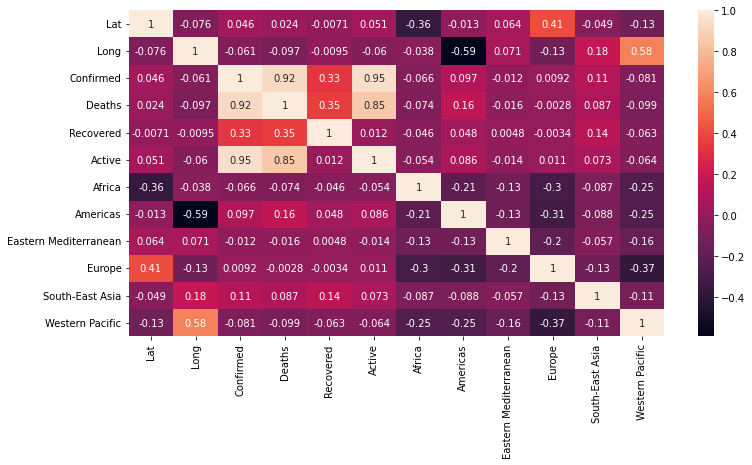

In [60]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

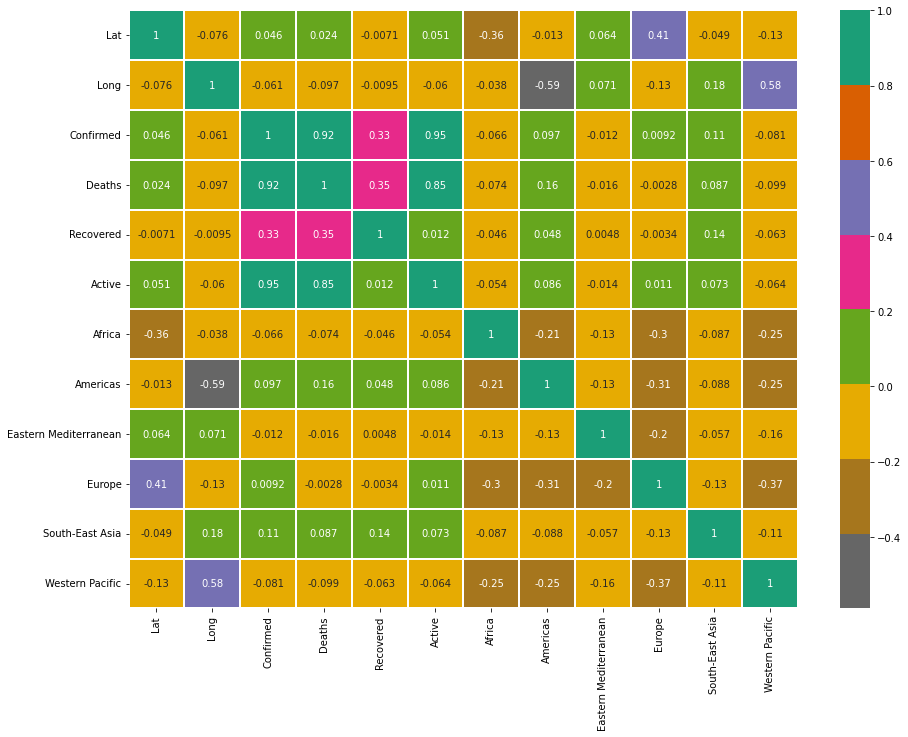

In [61]:
plt.figure(figsize=(15,11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

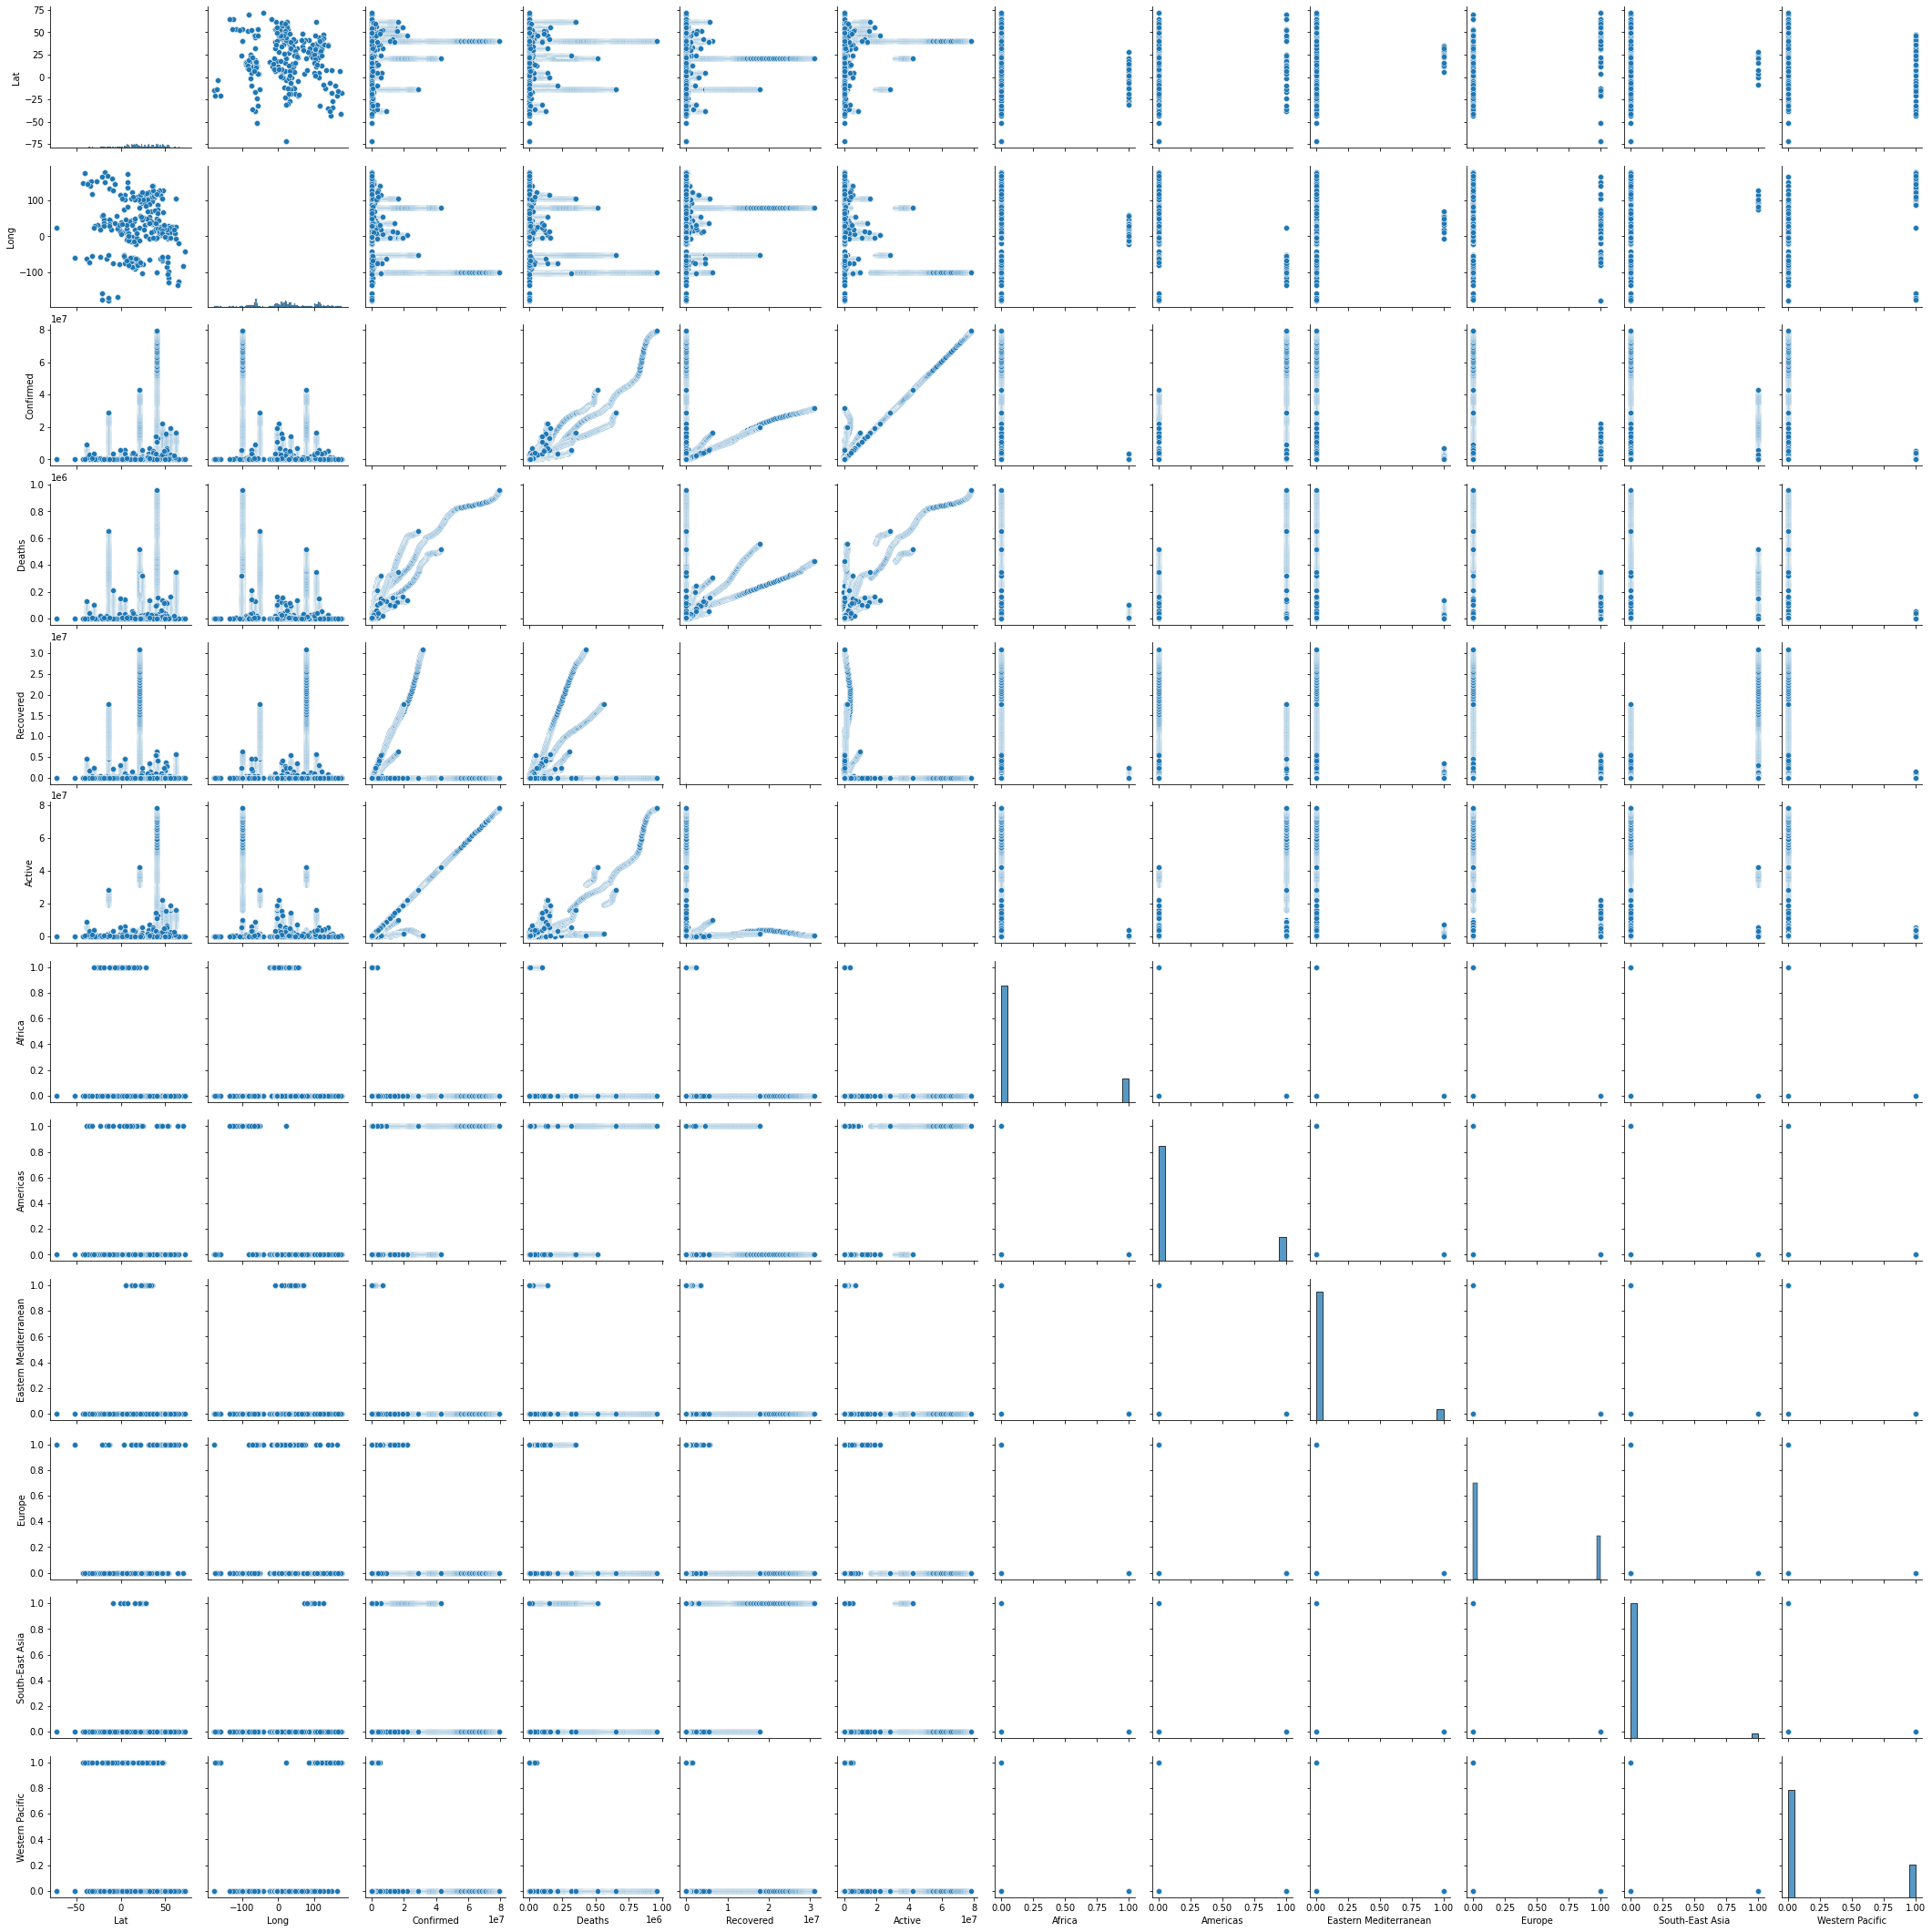

In [71]:
sns.pairplot(df)

In [72]:
import dtale
dtale.show(df)

In [73]:
df.head()

,Country,Lat,Long,Confirmed,Deaths,Recovered,Active,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific,Year,Month,Day
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,1,0,0,0,2020,01,22
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,1,0,0,2020,01,22
2,Algeria,28.03390,1.659600,0,0,0,0,1,0,0,0,0,0,2020,01,22
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,1,0,0,2020,01,22
4,Angola,-11.20270,17.873900,0,0,0,0,1,0,0,0,0,0,2020,01,22


In [74]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
count,214894.000000,214894.000000,2.148940e+05,214894.000000,2.148940e+05,2.148940e+05,214894.000000,214894.000000,214894.000000,214894.000000,214894.000000,214894.000000
mean,20.528131,22.735337,4.578132e+05,9310.764693,1.079987e+05,3.405037e+05,0.169065,0.172662,0.079137,0.309353,0.035971,0.233813
std,25.805808,76.029213,2.708770e+06,47497.835275,8.470111e+05,2.516382e+06,0.374810,0.377956,0.269953,0.462228,0.186219,0.423256
min,-71.949900,-178.116500,0.000000e+00,0.000000,0.000000e+00,-1.638280e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.428055,-23.041800,2.530000e+02,2.000000,0.000000e+00,1.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.041450,21.791500,5.223000e+03,71.000000,4.500000e+01,1.243000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.153300,88.092400,9.892275e+04,1675.000000,5.115750e+03,2.644675e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,71.706900,178.065000,7.925051e+07,958144.000000,3.097475e+07,7.829236e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,12.0,0.079421,0.337420,-0.358473,-0.056170,0.008378,0.054331,1.0
Long,12.0,0.063936,0.395343,-0.590534,-0.081492,-0.049105,0.097884,1.0
Confirmed,12.0,0.270590,0.428446,-0.080946,-0.023997,0.071473,0.478451,1.0
Deaths,12.0,0.259179,0.422058,-0.099093,-0.030297,0.055262,0.479851,1.0
Recovered,12.0,0.146795,0.302244,-0.062910,-0.007669,0.008573,0.187844,1.0
Active,12.0,0.236975,0.424435,-0.064088,-0.023964,0.031733,0.277979,1.0
Africa,12.0,-0.051061,0.348277,-0.358473,-0.216842,-0.080711,-0.051826,1.0
Americas,12.0,-0.016917,0.383096,-0.590534,-0.217638,-0.050751,0.088584,1.0
Eastern Mediterranean,12.0,0.034751,0.316018,-0.196196,-0.132654,-0.014832,0.019591,1.0
Europe,12.0,-0.001464,0.376452,-0.369714,-0.222618,-0.066338,0.009629,1.0


In [76]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Country" is
 China             26282
Canada            10822
United Kingdom    10049
France             9276
Australia          6184
                  ...  
Guatemala           773
Guinea              773
Guinea-Bissau       773
Guyana              773
Zimbabwe            773
Name: Country, Length: 197, dtype: int64
-------------------------------------------------
unique values in column "Lat" is
  20.528131    1546
 52.939900    1546
 42.708678     773
 12.521100     773
 28.166700     773
              ... 
 61.892600     773
 71.706900     773
 56.263900     773
 11.825100     773
-19.015438     773
Name: Lat, Length: 276, dtype: int64
-------------------------------------------------
unique values in column "Long" is
  22.735337     1546
 103.846700     773
-69.968300      773
 84.250000      773
 18.490400      773
               ... 
 33.429900      773
 15.473000      773
-6.911800       773
-42.604300      773
 29.154857      773
Name: Long, Length: 27

In [77]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [78]:
object_col

['Country', 'Year', 'Month', 'Day']

In [79]:
num_col

['Lat',
 'Long',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'Africa',
 'Americas',
 'Eastern Mediterranean',
 'Europe',
 'South-East Asia',
 'Western Pacific']

<AxesSubplot:>

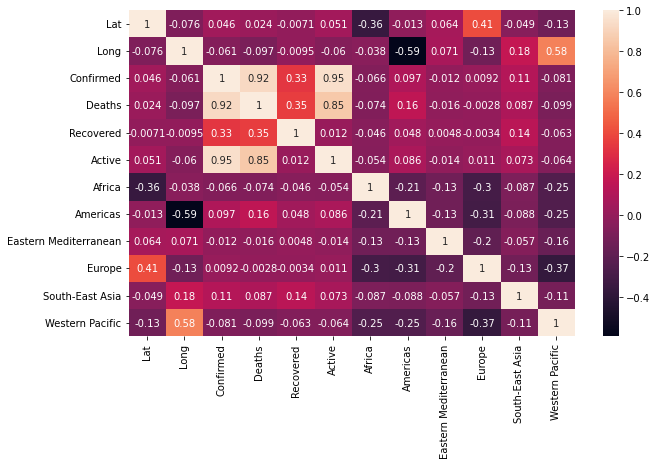

In [83]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [84]:
import sweetviz as sv
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [85]:
from IPython.display import IFrame

In [86]:
IFrame(src='Analyze.html',width=1000,height=600)

In [87]:
df.columns

Index(['Country', 'Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific', 'Year', 'Month', 'Day'],
      dtype='object')